In [1]:
# Variables:
!python -m pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

graph_ids = ['6_000', '6_003', '6_312']
graph_ids = ['6_rand_nsga']
input_data_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen'
out_dir = '/mnt/c/git/clevr-iep/data-graph'
default_vocab_path = '/mnt/c/git/clevr-iep/data/default-vocab.json'

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
# 0 - EXTRACT FEATURES
# ##########
!pwd

for graph_id in graph_ids[:1]:
    image_dir = f'{input_data_dir}/{graph_id}/images'
    out_h5_dir = f'{out_dir}/{graph_id}/feats'

    !mkdir -p {out_h5_dir}
    %run extract_features \
        --input_image_dir {image_dir} \
        --use_gpu 0 \
        --get_every_layer 1 \
        --model resnet101 \
        --model_stage 3 \
        --batch_size 1 \
        --output_h5_dir {out_h5_dir} \
        --output_h5_prefix k-resnet101 \
        --alt_naming
  
  # --output_h5_dir data/distinct \

/mnt/c/git/clevr-iep/scripts
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

/mnt/c/git/clevr-iep/scripts/extract_features.py:125: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  if len(cur_batch) == args.batch_size:
/mnt/c/git/clevr-iep/scripts/extract_features.py:126: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  feats = run_batch(cur_batch, model)


Processed 1 / 250 images
Processed 2 / 250 images
Processed 3 / 250 images
Processed 4 / 250 images
Processed 5 / 250 images
Processed 6 / 250 images
Processed 7 / 250 images
Processed 8 / 250 images
Processed 9 / 250 images
Processed 10 / 250 images
Processed 11 / 250 images
Processed 12 / 250 images
Processed 13 / 250 images
Processed 14 / 250 images
Processed 15 / 250 images
Processed 16 / 250 images
Processed 17 / 250 images
Processed 18 / 250 images
Processed 19 / 250 images
Processed 20 / 250 images
Processed 21 / 250 images
Processed 22 / 250 images
Processed 23 / 250 images
Processed 24 / 250 images
Processed 25 / 250 images
Processed 26 / 250 images
Processed 27 / 250 images
Processed 28 / 250 images
Processed 29 / 250 images
Processed 30 / 250 images
Processed 31 / 250 images
Processed 32 / 250 images
Processed 33 / 250 images
Processed 34 / 250 images
Processed 35 / 250 images
Processed 36 / 250 images
Processed 37 / 250 images
Processed 38 / 250 images
Processed 39 / 250 im

In [7]:
# 1 - PREPROCESS QUESTIONS
# ##########
graph_ids = ['6_000', '6_003', '6_312', '6_rand_nsga']
graph_ids = ['6_rand_nsga']
question_suffixes = ['obj-cnt', 'obj-ex', 'rel-cnt', 'rel-ex']

for graph_id in graph_ids:
    for suffix in question_suffixes:

        question_file = f'{input_data_dir}/{graph_id}/questions/{suffix}.json'
        out_h5_dir = f'{out_dir}/{graph_id}/questions'
        out_vocab_dir = f'{out_h5_dir}/vocab'

        !echo {question_file}
        !mkdir -p {out_h5_dir}
        !mkdir -p {out_vocab_dir}

        %run preprocess_questions \
            --input_questions_json {question_file} \
            --input_vocab_json {default_vocab_path} \
            --expand_vocab 1 \
            --output_h5_file {out_h5_dir}/{suffix}.h5 \
            --output_vocab_json {out_vocab_dir}/{suffix}.json \
            --encode_unk 1 \
            --mode prefix

/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga/questions/obj-cnt.json
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(4000, 9)
(4000, 6)
/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga/questions/obj-ex.json
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(4000, 8)
(4000, 6)
/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga/questions/rel-cnt.json
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(73472, 17)
(73472, 10)
/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga/questions/rel-ex.json
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(73472, 17)
(73472, 10)


In [8]:
# 2 - GET SOLUTION FROM FEATS
# ##########

graph_ids = ['6_000', '6_003', '6_312', '6_rand_nsga']
# graph_ids = ['6_000', '6_003', '6_312']

question_suffixes = ['obj-cnt', 'obj-ex', 'rel-cnt', 'rel-ex']
approach = 'resnet101'

models_dir = '/mnt/c/git/clevr-iep/models/CLEVR'

for graph_id in graph_ids[:]:
    for suffix in question_suffixes[3:]:

        input_questions_file = f'{out_dir}/{graph_id}/questions/{suffix}.h5'
        input_features_file = f'{out_dir}/{graph_id}/feats/k-{approach}_0_250.h5' # TODO parametrize numbers
        input_vocab_path = f'{out_dir}/{graph_id}/questions/vocab/{suffix}.json'

        out_ans_dir = f'{out_dir}/{graph_id}/answers/{approach}/{suffix}'
        !mkdir -p {out_ans_dir}
        max_i = 100 if suffix.startswith('rel') else 250

        # TODO make decoder a parameter
        # TODO make output dir specification more parametrized
        
        %run answer_qs_from_features \
            --models_dir {models_dir} \
            --use_gpu 0 \
            --questions_interval 1 \
            --num_images {max_i} \
            --questions_file {input_questions_file} \
            --image_features {input_features_file} \
            --vocab_json {input_vocab_path} \
            --output_dir {out_ans_dir}


  0%|          | 0/1 [00:00<?, ?it/s]

Loading program generator from  program_generator_700k.pt
Loading execution engine from  execution_engine_700k_strong.pt
Loading image features from  /mnt/c/git/clevr-iep/data-graph/6_000/feats/k-resnet101_0_250.h5
Loading question from  /mnt/c/git/clevr-iep/data-graph/6_000/questions/rel-ex.h5
31296
1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-

100%|██████████| 1/1 [41:52<00:00, 2512.58s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

Loading program generator from  program_generator_700k.pt
Loading execution engine from  execution_engine_700k_strong.pt
Loading image features from  /mnt/c/git/clevr-iep/data-graph/6_003/feats/k-resnet101_0_250.h5
Loading question from  /mnt/c/git/clevr-iep/data-graph/6_003/questions/rel-ex.h5
29824
1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-

100%|██████████| 1/1 [38:22<00:00, 2302.87s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

Loading program generator from  program_generator_700k.pt
Loading execution engine from  execution_engine_700k_strong.pt
Loading image features from  /mnt/c/git/clevr-iep/data-graph/6_312/feats/k-resnet101_0_250.h5
Loading question from  /mnt/c/git/clevr-iep/data-graph/6_312/questions/rel-ex.h5
30080
1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-

100%|██████████| 1/1 [39:22<00:00, 2362.17s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

Loading program generator from  program_generator_700k.pt
Loading execution engine from  execution_engine_700k_strong.pt
Loading image features from  /mnt/c/git/clevr-iep/data-graph/6_rand_nsga/feats/k-resnet101_0_250.h5
Loading question from  /mnt/c/git/clevr-iep/data-graph/6_rand_nsga/questions/rel-ex.h5
29760
1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-

100%|██████████| 1/1 [44:29<00:00, 2669.27s/it]


In [15]:
# 3 - ANALYSE IMAGE SUBSET

question_suffixes = ['obj-cnt', 'obj-ex', 'rel-cnt', 'rel-ex']
encoder = 'resnet101'
decoders = ['9k', '18k', '700k_strong']

default_vocab_path = '/mnt/c/git/clevr-iep/data/default-vocab.json'
data_dir = '/mnt/c/git/clevr-iep/data-graph/6_rand_nsga'
question_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga'
answer_dir = 'answers/'

parallels_dir = '/mnt/c/git/clevr-iep/data-graph'
figs_dir = '/mnt/c/git/clevr-iep/data-graph/figs'

for suffix in question_suffixes[:]:
    for decoder in decoders[:]:
        
        max_i = 100 if suffix.startswith('rel') else 250

        %run analyse_image_subsets \
            --encoder {encoder} \
            --decoder_name {decoder} \
            --answers_name {answer_dir} \
            --suffix {suffix} \
            --images_min 0 \
            --images_max {max_i} \
            --vocab_json {default_vocab_path} \
            --data_dir {data_dir} \
            --questions_dir {question_dir} \
            --parallels_dir {parallels_dir} \
            --num_random_plots 200 \
            --figs_dir {figs_dir} \
            --shape_analysis \
            --plot_shape_cvg 
            # --plot_random \
            # --print_global \

            # --encoder_dir {input_encoder_dir} \
            # --rankings_path ${WORKDIR}/rankings \
            # --features_dir ${SRCDIR}/data/distinct-feats

>>> enc=resnet101, dec=9k, qs=answers/, ims=[0..250]
  Measuring Shape Coverage
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-best-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/convergence/shape-best-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-worst-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/convergence/shape-worst-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-best-2147483647/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/convergence/shape-best-2147483647/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-worst-2147483647/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-gra

<Figure size 432x288 with 0 Axes>

In [11]:
# 4 - Do analysis over 6_rand_nsga
input_scene_file = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga/scenes.json'
data_dir = '/mnt/c/git/clevr-iep/data-graph/6_rand_nsga'
parallels_dir = '/mnt/c/git/clevr-iep/data-graph'
question_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga'
figs_dir = '/mnt/c/git/clevr-iep/data-graph/figs'

%run analyse_shape_v_accuracy \
    --input_scene_file {input_scene_file} \
    --data_dir {data_dir} \
    --parallels_dir {parallels_dir} \
    --questions_dir {question_dir} \
    --images_min 0 \
    --figs_dir {figs_dir} \
    --save_accuracy_2_shape
    
    # \
    # --save_f1 \
    # --save_manhattan \
    # --save_cosine_sim \
    # --save_num_2_acc

>>> enc=resnet101, dec=9k, qs=obj-cnt, ims=[0..250]
{'0': {'0010001000000001100011000': 0, '1000110000001001000000100': 1, '0000010000000011010001010': 2, '0011100100010100000000000': 3, '0001100010000000111000000': 4, '1010010000001001000001000': 5, '0010000011000000010001010': 6, '0100101000001011000000000': 7, '0001010010100001010000000': 8, '0000100010000000110000101': 9, '0010001011001000000001000': 10, '0001100100100001010000000': 11, '0011000011010000010000000': 12, '1110000000010001010000000': 13, '0011000010000001110000000': 14, '1100100000100001010000000': 15, '0011010010001001000000000': 16, '0100001010100001010000000': 17, '0110000010000001010000010': 18, '0110001010001001000000000': 19, '0110100010001000000000001': 20, '0011100011001000000000000': 21, '1110100000010100000000000': 22, '1010000000000001110001000': 23, '0000011010001001000000100': 24, '0000101100001001000000100': 25, '0000010010100000010001001': 26, '0000010010000001010000110': 27, '0010000100000001010001010'

250it [00:00, 46325.43it/s]

    Saving csv at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/shape_analysis/accuracy_vs_shape/obj-cnt-250/9k.csv
>>> enc=resnet101, dec=18k, qs=obj-cnt, ims=[0..250]


{'0': {'0010001000000001100011000': 0, '1000110000001001000000100': 1, '0000010000000011010001010': 2, '0011100100010100000000000': 3, '0001100010000000111000000': 4, '1010010000001001000001000': 5, '0010000011000000010001010': 6, '0100101000001011000000000': 7, '0001010010100001010000000': 8, '0000100010000000110000101': 9, '0010001011001000000001000': 10, '0001100100100001010000000': 11, '0011000011010000010000000': 12, '1110000000010001010000000': 13, '0011000010000001110000000': 14, '1100100000100001010000000': 15, '0011010010001001000000000': 16, '0100001010100001010000000': 17, '0110000010000001010000010': 18, '0110001010001001000000000': 19, '0110100010001000000000001': 20, '0011100011001000000000000': 21, '1110100000010100000000000': 22, '1010000000000001110001000': 23, '0000011010001001000000100': 24, '0000101100001001000000100': 25, '0000010010100000010001001': 26, '0000010010000001010000110': 27, '0010000100000001010001010': 28, '0000010000010010010001001': 29, '000010010000

250it [00:00, 34580.22it/s]

    Saving csv at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/shape_analysis/accuracy_vs_shape/obj-cnt-250/18k.csv
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, ims=[0..250]


{'0': {'0010001000000001100011000': 0, '1000110000001001000000100': 1, '0000010000000011010001010': 2, '0011100100010100000000000': 3, '0001100010000000111000000': 4, '1010010000001001000001000': 5, '0010000011000000010001010': 6, '0100101000001011000000000': 7, '0001010010100001010000000': 8, '0000100010000000110000101': 9, '0010001011001000000001000': 10, '0001100100100001010000000': 11, '0011000011010000010000000': 12, '1110000000010001010000000': 13, '0011000010000001110000000': 14, '1100100000100001010000000': 15, '0011010010001001000000000': 16, '0100001010100001010000000': 17, '0110000010000001010000010': 18, '0110001010001001000000000': 19, '0110100010001000000000001': 20, '0011100011001000000000000': 21, '1110100000010100000000000': 22, '1010000000000001110001000': 23, '0000011010001001000000100': 24, '0000101100001001000000100': 25, '0000010010100000010001001': 26, '0000010010000001010000110': 27, '0010000100000001010001010': 28, '0000010000010010010001001': 29, '000010010000

250it [00:00, 39221.10it/s]

    Saving csv at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/shape_analysis/accuracy_vs_shape/obj-cnt-250/700k_strong.csv


NameError: name 'exit' is not defined

In [14]:
# 5 - Do graph comparison analysis
input_data_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen'
out_dir = '/mnt/c/git/clevr-iep/data-graph'
default_vocab_path = '/mnt/c/git/clevr-iep/data/default-vocab.json'

%run analyse_graph_comparison \
    --data_dir {out_dir} \
    --questions_dir {input_data_dir} \
    --vocab_json {default_vocab_path} \
    --images_min 0 \
    --images_max 250 \
    --figs_dir {out_dir}/figs \
    --save_graph_2_accuracy_distrib \
    --save_graph_2_accuracy \
    --save_stat_sig

    #\
    # --print_accuracy

>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 178785.34it/s]
250it [00:00, 179335.73it/s]
250it [00:00, 175640.87it/s]
250it [00:00, 158108.56it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-cnt-250/9k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-cnt-250/9k.txt
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 113384.08it/s]
250it [00:00, 119183.45it/s]
250it [00:00, 54775.95it/s]
250it [00:00, 230203.29it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-cnt-250/18k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-cnt-250/18k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-cnt-250/18k.txt
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 94101.77it/s]
250it [00:00, 235212.20it/s]
250it [00:00, 305796.44it/s]
250it [00:00, 198218.53it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-cnt-250/700k_strong.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-cnt-250/700k_strong.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-cnt-250/700k_strong.txt
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 203133.67it/s]
250it [00:00, 169809.88it/s]
250it [00:00, 258333.58it/s]
250it [00:00, 179213.13it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-ex-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-ex-250/9k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-ex-250/9k.txt
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 219275.62it/s]
250it [00:00, 199538.73it/s]
250it [00:00, 305529.14it/s]
250it [00:00, 292980.16it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-ex-250/18k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-ex-250/18k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-ex-250/18k.txt
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 128896.87it/s]
250it [00:00, 77146.56it/s]
250it [00:00, 110063.61it/s]
250it [00:00, 175670.30it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-ex-250/700k_strong.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-ex-250/700k_strong.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-ex-250/700k_strong.txt


NameError: name 'exit' is not defined

<Figure size 432x288 with 0 Axes>

Loading image features from  /mnt/c/git/clevr-iep/data-graph/6_rand_nsga/feats/k-resnet101_0_250.h5
Loading image features from  /mnt/c/git/clevr-iep/data-graph/6_000/feats/k-resnet101_0_250.h5
  Compared to 6_000
    Approach: IsolationForest()
      Rep #0, original torch.Size([250, 200704]): 250 inliers, 0 outliers
      Rep #1, svd (250, 64): 249 inliers, 1 outliers
      Rep #2, pca (250, 64): 250 inliers, 0 outliers
      Rep #3, x-m (250, 2): 122 inliers, 128 outliers
      Rep #4, x-t (250, 2): 122 inliers, 128 outliers
      Rep #5, s-m (250, 2): 155 inliers, 95 outliers
      Rep #6, s-t (250, 2): 138 inliers, 112 outliers
      Rep #7, p-m (250, 2): 166 inliers, 84 outliers
      Rep #8, p-t (250, 2): 186 inliers, 64 outliers
    Approach: OneClassSVM()
      Rep #0, original torch.Size([250, 200704]): 68 inliers, 182 outliers
      Rep #1, svd (250, 64): 126 inliers, 124 outliers
      Rep #2, pca (250, 64): 120 inliers, 130 outliers
      Rep #3, x-m (250, 2): 119 inliers,

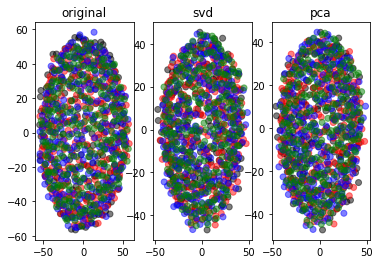

<<<<tsne2>>>>


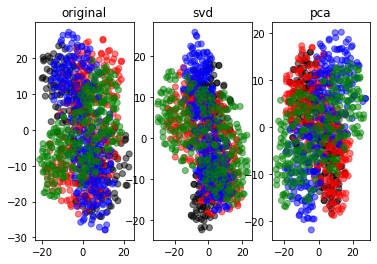

NameError: name 'exit' is not defined

In [66]:
# 6 - Do MDS analysis of features
# ##########

out_dir = '/mnt/c/git/clevr-iep/data-graph'
encoder = 'resnet101'

%run analyse_features.py \
    --data_dir {out_dir} \
    --encoder {encoder} \
    --min_index 0 \
    --max_index 250 \
    --figs_dir {out_dir}/figs \
    --num_samples 250 \
    --num_deco_feats 64